# Lab 4 - part1
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [32]:
from commonfunctions import *
import math
import numpy as np
import skimage
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


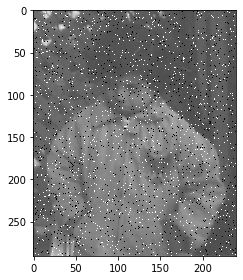

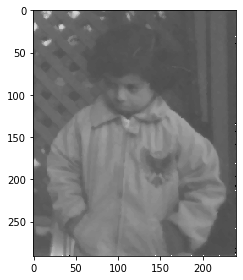

[[0.41960784 0.42352941 0.41960784 ... 0.32941176 0.3254902  0.3254902 ]
 [0.42745098 0.41568627 0.42352941 ... 0.32941176 0.32941176 0.3372549 ]
 [0.41960784 0.41568627 0.43137255 ... 0.32941176 0.3254902  0.3254902 ]
 ...
 [0.38039216 0.38823529 1.         ... 0.32156863 0.32156863 0.3254902 ]
 [0.38823529 0.38431373 0.38431373 ... 0.32941176 0.32941176 1.        ]
 [0.39607843 0.38823529 0.38823529 ... 0.38039216 0.38039216 0.38039216]]


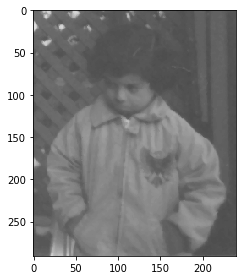

In [36]:
'''
(1) Averaging Filter
'''
def getMedian(Matrix):
    mList=[]
    for i in range(3):
        for j in  range(3):
            mList.append(Matrix[i][j])
    mList.sort()
    
    return mList[4]
    
mPic = io.imread('pout.tif')
rGrayScale=rgb2gray(mPic)


NoiseImage=random_noise(rGrayScale,mode='s&p',amount=0.05)
NoiseImage2=np.copy(NoiseImage)
io.imshow(NoiseImage) # 0~255 np.zeros((2, 1))
io.show()
Dim=np.shape(NoiseImage)
#ExtendendMatrix=np.zeros(1+Dim[0],1+Dim[1])
WindowWidth=3
WindowHeight=3

EdgeX=(int)(WindowWidth/2)
EdgeY=(int)(WindowWidth/2)

for i in range(Dim[0]-EdgeX):
    for j in range (Dim[1]-EdgeY):
        MedianFilter=np.zeros((WindowWidth,WindowHeight))
        for fx in range(WindowWidth):
            for fy in range (WindowHeight):
                MedianFilter[fx][fy]=NoiseImage[i+fx-EdgeX][j+fy-EdgeY]
        NoiseImage[i][j]=getMedian(MedianFilter)
io.imshow(NoiseImage) # 0~255 np.zeros((2, 1))
io.show()
print(NoiseImage2)
NoiseImage2 = (NoiseImage2*255).astype(np.uint8)
NoiseImage2=skimage.filters.median(NoiseImage2)

io.imshow(NoiseImage2) # 0~255 np.zeros((2, 1))
io.show()




[[0.         0.42352941 0.41960784 ... 0.32941176 0.3254902  0.3254902 ]
 [0.42745098 0.41568627 0.42352941 ... 0.32941176 0.32941176 0.3372549 ]
 [0.41960784 0.41568627 0.43137255 ... 0.         0.3254902  0.3254902 ]
 ...
 [0.38039216 0.38823529 0.39607843 ... 0.32156863 0.32156863 0.3254902 ]
 [0.38823529 0.38431373 0.38431373 ... 0.32941176 0.32941176 0.3372549 ]
 [0.39607843 0.38823529 0.38823529 ... 0.38039216 0.38039216 0.38039216]]


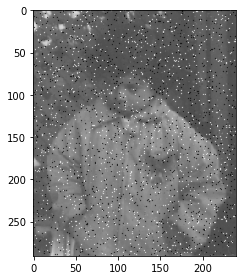

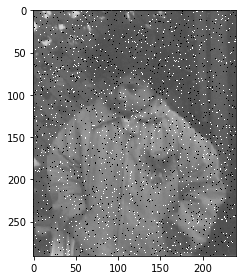

In [40]:
'''
(2) Median Filter
'''

mPic = io.imread('pout.tif')
rGrayScale=rgb2gray(mPic)
NoiseImage=random_noise(rGrayScale,mode='s&p',amount=0.05)
print(NoiseImage)
NoiseImage = (NoiseImage*255).astype(np.uint8)
NoiseImage2=np.copy(NoiseImage)
NoiseImage=skimage.filters.gaussian(NoiseImage, sigma=0.5, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
io.imshow(NoiseImage) # 0~255 np.zeros((2, 1))
io.show()
NoiseImage2=skimage.filters.gaussian(NoiseImage2, sigma=0.2, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
io.imshow(NoiseImage2) # 0~255 np.zeros((2, 1))
io.show()

In [ ]:

'''
(BONUS)
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''